# From a given image, the model classifies if the image is a Dog or a Cat

##### (Using google colab to work on the problem)

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d bohraboxer/cattyvsdoggy
!ls

 96% 521M/543M [00:08<00:00, 68.7MB/s]
100% 543M/543M [00:08<00:00, 67.8MB/s]
cattyvsdoggy.zip  kaggle.json  sample_data


## Exploratory Data analysis

### Images of dogs

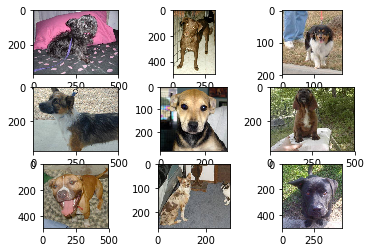

In [4]:
# From the image, we see that the image is not of same length

## packages to plot image
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'train/'
# plotting of first 9 images of dog
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	# defining filename
	filename = folder + 'dog.' + str(i) + '.jpg'
	# load of image pixels
	image = imread(filename)
	# plot of raw pixel data
	pyplot.imshow(image)
pyplot.show()

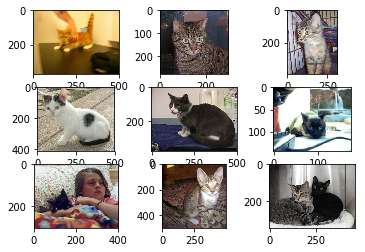

In [5]:
# From the image, we see that the image is not of same length

# packages to plot image
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'train/'
# plot first 9 cat images
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'cat.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
pyplot.show()

#### From the above plots we see that the image is not of same  length. To train the model with the training data, we need to have images of same 

#  

##  Data Preparation

In [6]:
# loading the dogs vs cats dataset.
# Reshaping the image and saving to a new file

## Importing of required packages
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


# define location of dataset
folder = 'train/'
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
	# determine class
	output = 0.0
	if file.startswith('cat'):
		output = 1.0
	# load image
	photo = load_img(folder + file, target_size=(100, 100))
	# convert to numpy array
	photo = img_to_array(photo)
	# store
	photos.append(photo)
	labels.append(output)
# convert to a numpy arrays
# numpy array is stored in "photos" and labelling is stored in "labels"
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

Using TensorFlow backend.


(25000, 100, 100, 3) (25000,)


#### The  raw image data is reshaped into (100 * 100).
#### The Cat image is labeled as 1 and Dog image is labeled as 0
#### The image is converted to an array 

In [0]:
#Importing the required packages
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random


# creating the directories
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# creating label subdirectories
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)
        
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = 'train/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if random() < val_ratio:
		dst_dir = 'test/'
	if file.startswith('cat'):
		dst = dataset_home + dst_dir + 'cats/'  + file
		copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dataset_home + dst_dir + 'dogs/'  + file
		copyfile(src, dst)

#### The data is split into train and test directory with both folders containing Cat and Dog  images separately.

#  

## Model building 

In [0]:
# importing the required packages

import sys
from keras.layers import Conv2D
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator

In [0]:
# function to plot Loss and Accurcay of both train and test data

def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['acc'], color='blue', label='train')
	pyplot.plot(history.history['val_acc'], color='orange', label='test')
	pyplot.show()

### 1. CNN with 1 hidden layer(32). 

In [0]:
# defining a cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(100, 100, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.
Epoch 1/20
293/293 [==============================] - 72s 244ms/step - loss: 0.6674 - acc: 0.5914 - val_loss: 0.6306 - val_acc: 0.6491
Epoch 2/20
293/293 [==============================] - 71s 242ms/step - loss: 0.6294 - acc: 0.6384 - val_loss: 0.6245 - val_acc: 0.6475
Epoch 3/20
293/293 [==============================] - 69s 237ms/step - loss: 0.6093 - acc: 0.6584 - val_loss: 0.6026 - val_acc: 0.6705
Epoch 4/20
293/293 [==============================] - 69s 236ms/step - loss: 0.5832 - acc: 0.6880 - val_loss: 0.5863 - val_acc: 0.6862
Epoch 5/20
293/293 [==============================] - 70s 238ms/step - loss: 0.5654 - acc: 0.7031 - val_loss: 0.5813 - val_acc: 0.6989
Epoch 6/20
293/293 [==============================] - 68s 233ms/step - loss: 0.5449 - acc: 0.7229 - val_loss: 0.5579 - val_acc: 0.7114
Epoch 7/20
293/293 [==============================] - 70s 238ms/step - loss: 0.5222 - acc: 0.7406 - val_l

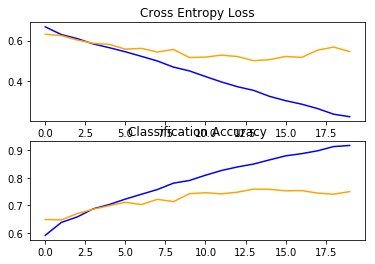

In [24]:
# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# rescaling the image by divining each pixel by 255
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators and resizing the image to (100*100)
	train_it = datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
		class_mode='binary', batch_size=64, target_size=(100, 100))
	test_it = datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
		class_mode='binary', batch_size=64, target_size=(100, 100))
	# fitting of model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=1)
	# evaluate model
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)
	print('accuracy is > %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
 # entry point, run the test harness
run_test_harness()

### The model built with 1 hidden layer gives an accuracy of 75%. In the model, there is not much changes in the test data after 7 to 10 epochs.

#  

## 2. CNN with 3 hidden layers (32,64,128)

In [0]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(100, 100, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.25))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.25))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.25))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.5))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.
Epoch 1/30
293/293 [==============================] - 109s 373ms/step - loss: 0.7247 - acc: 0.5121 - val_loss: 0.6923 - val_acc: 0.5186
Epoch 2/30
293/293 [==============================] - 106s 363ms/step - loss: 0.6873 - acc: 0.5372 - val_loss: 0.6919 - val_acc: 0.5058
Epoch 3/30
293/293 [==============================] - 105s 359ms/step - loss: 0.6872 - acc: 0.5498 - val_loss: 0.6869 - val_acc: 0.5513
Epoch 4/30
293/293 [==============================] - 106s 363ms/step - loss: 0.6853 - acc: 0.5551 - val_loss: 0.6887 - val_acc: 0.5305
Epoch 5/30
293/293 [==============================] - 106s 363ms/step - loss: 0.6795 - acc: 0.5654 - val_loss: 0.6860 - val_acc: 0.5409
Epoch 6/30
293/293 [==============================] - 105s 358ms/step - loss: 0.6787 - acc: 0.5722 - val_loss: 0.6831 - val_acc: 0.5883
Epoch 7/30
293/293 [==============================] - 105s 357ms/step - loss: 0.6761 - acc: 0.5798 

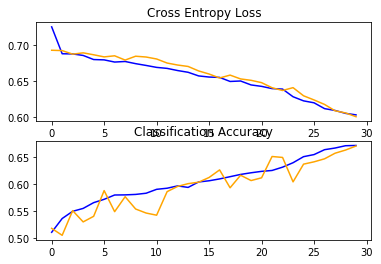

In [37]:
def run_test_harness():
	# define model
	model = define_model()
	# create data generators
	train_datagen = ImageDataGenerator(rescale=1.0/255.0,
		width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	test_datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = train_datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
		class_mode='binary', batch_size=64, target_size=(100, 100))
	test_it = test_datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
		class_mode='binary', batch_size=64, target_size=(100, 100))
	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=30, verbose=1)
	# evaluate model
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

#### The model built with 3 hidden layer gives an accuracy of 67%. In the model, the accuracy keeps getting better with increase in epcohs. To increase the accuracy, we need to increase to number of epochs to get the better accuracy.

#   

## 3. Transfer Learning (VGG16) 

#### To train a model, we need alot of data and computational resources to build a very good performing model. Instead of building a model form scratch, we can use the pre-trained models to extract features from the image and thereby reducing the time to train model. 

#### we choose pretrained model of VGG16 and only use aur training data in the last layer.  

In [0]:
# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 2s 0us/step
Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
293/293 [==============================] - 144s 493ms/step - loss: 0.7250 - acc: 0.9491 - val_loss: 0.4471 - val_acc: 0.9683
Epoch 2/10
293/293 [==============================] - 131s 448ms/step - loss: 0.4027 - acc: 0.9715 - val_loss: 0.4207 - val_acc: 0.9678
Epoch 3/10
293/293 [==============================] - 130s 445ms/step - loss: 0.2526 - acc: 0.9778 - val_loss: 0.1692 - val_acc: 0.9767
Epoch 4/10
293/293 [==============================] - 130s 445ms/step - loss: 0.0781 - acc: 0.9843 - val_loss: 0.0696 - val_acc: 0.9741
Epoch 5/10
293/293 [==============================] - 132s 449ms/step - loss: 0.0304 - acc: 0.9930 - val_loss: 0.0718 - val_acc: 0.9760
Epoch 6/10
293/293 [==============================

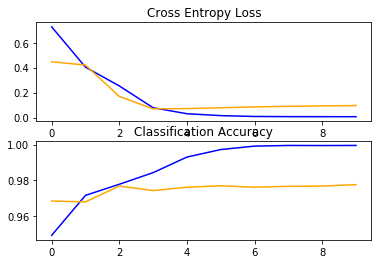

In [11]:
# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
	train_it = datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	test_it = datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
	# evaluate model
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

### The model with transfer learning gives an accuracy of 97%.  

#   

# Conclusion

In [2]:
from prettytable import PrettyTable    
x = PrettyTable()
 
x.field_names = ["MLP_MODEL","Epochs", "TRAIN_ACCURACY", "TEST_ACCURACY"]

x.add_row(["CNN with 1 conv layers and kernel size of 3*3",20, 0.91, 0.74])
x.add_row(["CNN with 3 conv layers and kernel size of 3*3 with dropout layers",30, 0.67, 0.67])
x.add_row(["CNN with transfer learning",10, 0.9995, 0.9775])

print('\t\t\tConvolutional Neural Network ')
print(x)

			Convolutional Neural Network 
+-------------------------------------------------------------------+--------+----------------+---------------+
|                             MLP_MODEL                             | Epochs | TRAIN_ACCURACY | TEST_ACCURACY |
+-------------------------------------------------------------------+--------+----------------+---------------+
|           CNN with 1 conv layers and kernel size of 3*3           |   20   |      0.91      |      0.74     |
| CNN with 3 conv layers and kernel size of 3*3 with dropout layers |   30   |      0.67      |      0.67     |
|                     CNN with transfer learning                    |   10   |     0.9995     |     0.9775    |
+-------------------------------------------------------------------+--------+----------------+---------------+
